In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score
from  sklearn.pipeline import Pipeline

In [16]:
data = pd.read_csv("3-customersatisfaction.csv")

In [17]:
data

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365
...,...,...,...
95,95,2.055072,8.686851
96,96,0.864149,2.901486
97,97,-1.586101,0.786207
98,98,1.558528,5.447475


In [18]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [19]:
data.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [21]:
data.isnull().sum()

Customer Satisfaction    0
Incentive                0
dtype: int64

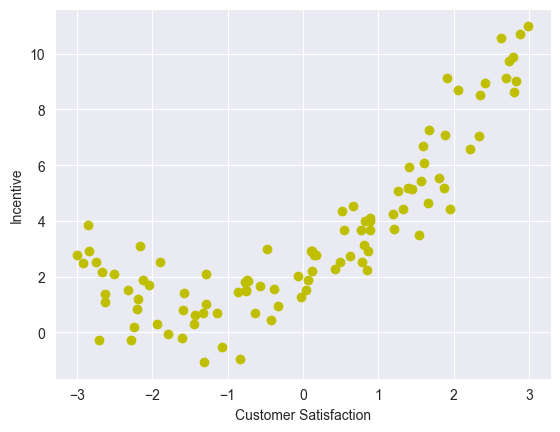

In [22]:
plt.scatter(data["Customer Satisfaction"], data["Incentive"], color="y")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [23]:
# dependent and independent features

X=data[["Customer Satisfaction"]]
y=data["Incentive"]

In [25]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [26]:
y.head()

0     1.010513
1     2.281043
2     4.415053
3    10.563600
4     0.627365
Name: Incentive, dtype: float64

In [27]:
# train test - split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [30]:
# scaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# prediction

In [36]:
y_pred = regression.predict(X_test)

In [37]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [40]:
r2Score = r2_score(y_test, y_pred)
print(r2Score) #bad score

0.2705652535622246


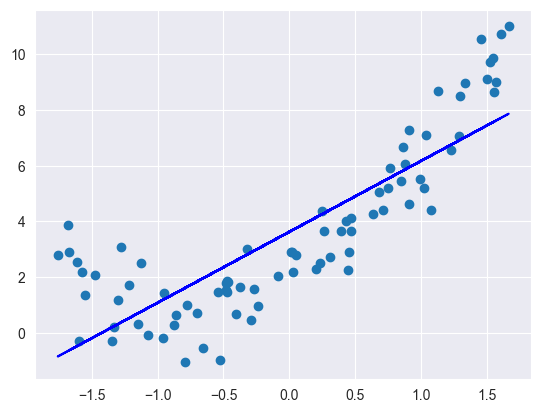

In [41]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color="b")
plt.show()

In [44]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [45]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [46]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [48]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
y_pred = regression.predict(X_test_poly)

In [51]:
r2Score = r2_score(y_test, y_pred)
print(r2Score)

0.7685687698788557


In [52]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [53]:
regression.intercept_

np.float64(2.076676429793281)

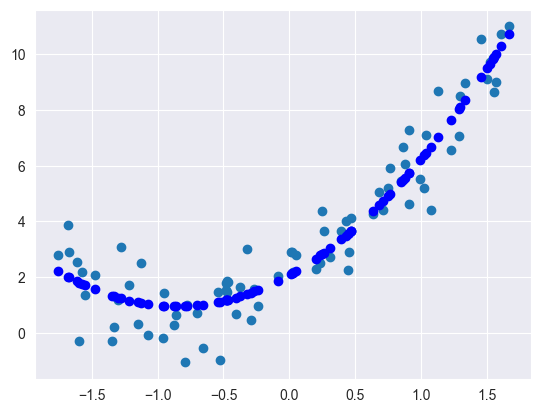

In [55]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color="b")
plt.show()

In [56]:
# degree 3

In [57]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [58]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
y_pred = regression.predict(X_test_poly)

In [62]:
r2Score = r2_score(y_test, y_pred)
print(r2Score) # best degree 2 because degree 2 r2_score = 0.76

0.7573443621401051


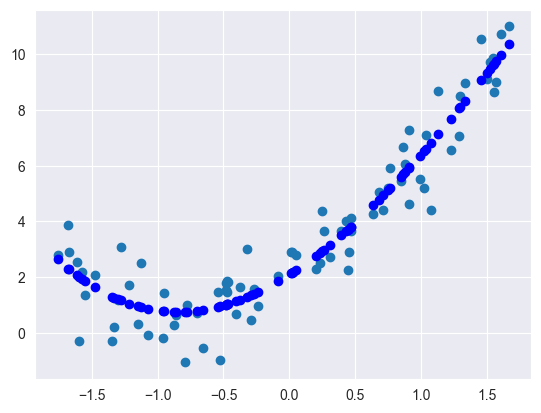

In [61]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color="b")
plt.show()

In [63]:
# new data

In [64]:
new_data = pd.read_csv("3-newdatas.csv")

In [65]:
new_data

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [75]:
new_data.rename(columns = {"Custumer Satisfaction": "Customer Satisfaction"}, inplace=True)

In [76]:
new_data

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [77]:
X_new = new_data[["Customer Satisfaction"]]

In [78]:
X_new

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [80]:
X_new = scaler.fit_transform(X_new)

In [82]:
X_new_poly = poly.transform(X_new)

In [83]:
y_new = regression.predict(X_new_poly)

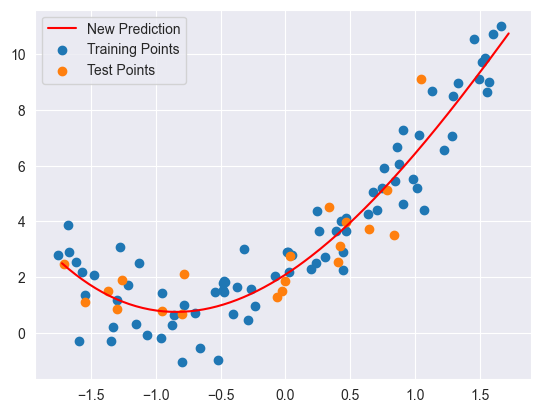

In [88]:
plt.plot(X_new, y_new, "r", label="New Prediction")
plt.scatter(X_train, y_train, label="Training Points")
plt.scatter(X_test, y_test, label="Test Points")
plt.legend()
plt.show()

In [89]:
#pipline

In [98]:
def poly_regression(degree):
    scaler = StandardScaler()
    poly_features = PolynomialFeatures(degree = degree)
    lin_reg = LinearRegression()
    pipline = Pipeline([
        ("standard_scaler", scaler),
        ("poly_features", poly_features),
        ("lin_reg", lin_reg),
    ])

    pipline.fit(X_train, y_train)
    score = pipline.score(X_test, y_test)
    print("R2 Score: ", score)

    y_pred_new = pipline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="New Prediction")
    plt.scatter(X_train, y_train, label="Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()

R2 Score:  0.2705652535622246


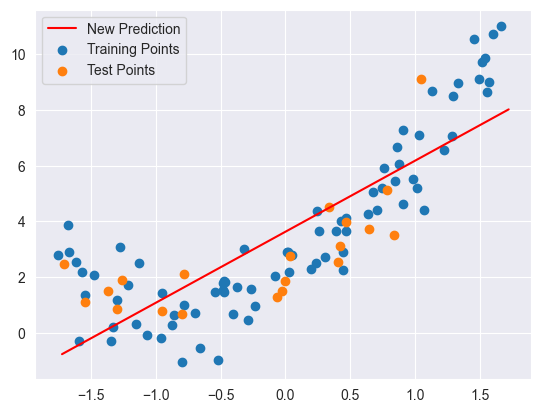

R2 Score:  0.7685687698788558


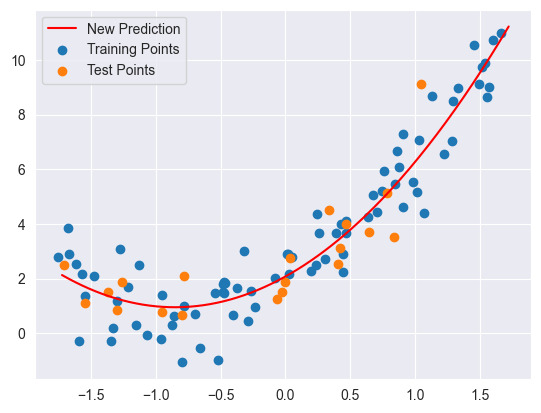

R2 Score:  0.7573443621401048


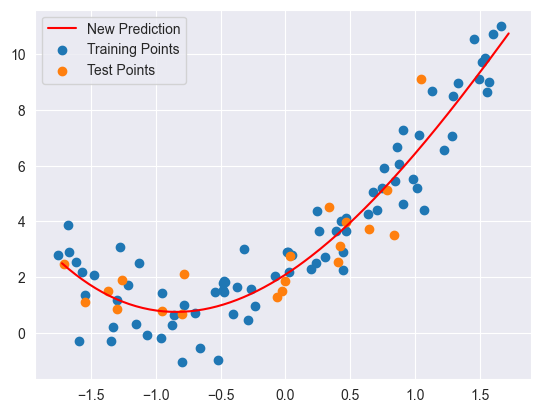

R2 Score:  0.7355034443260413


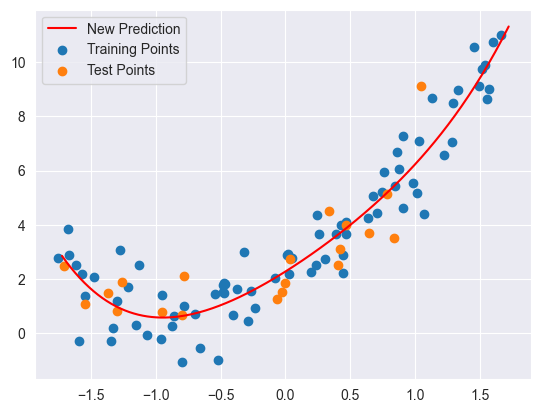

R2 Score:  0.7351244165095402


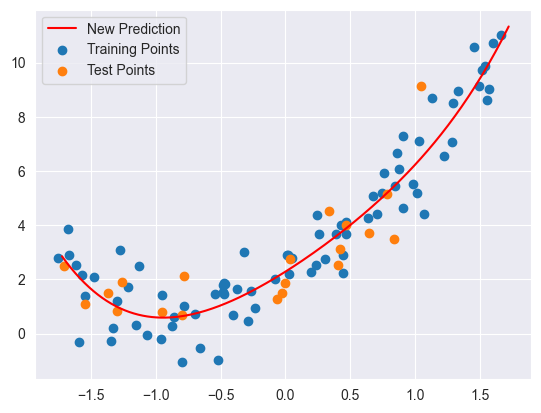

R2 Score:  0.734359048213343


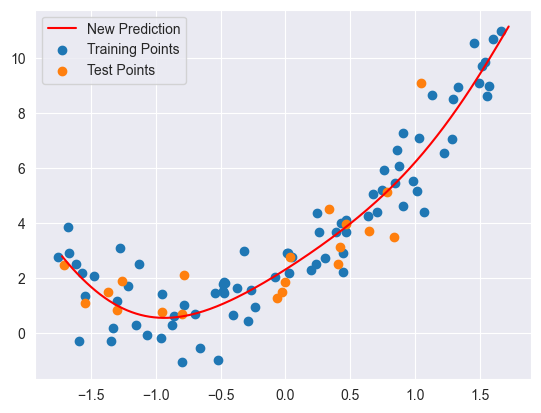

R2 Score:  0.7347819263549451


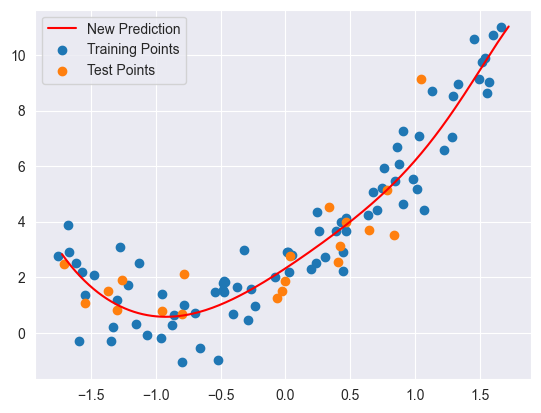

R2 Score:  0.7411422099998375


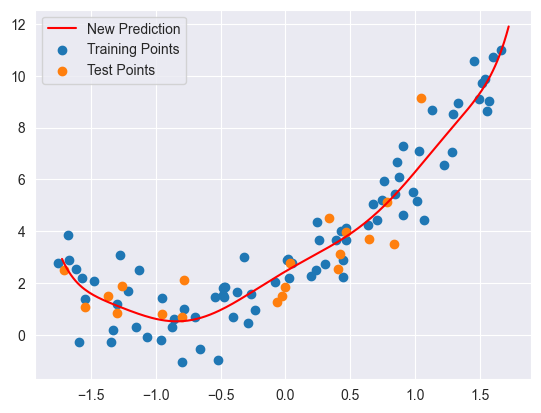

R2 Score:  0.7310763879815918


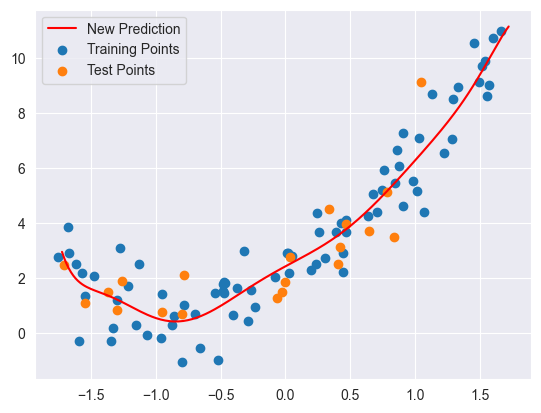

R2 Score:  0.728057862123283


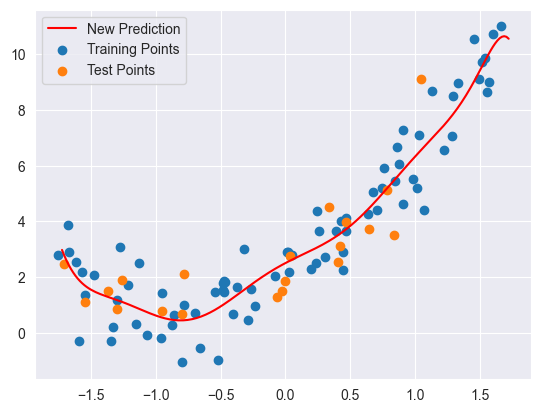

In [99]:
for degree in range(1, 11):
    poly_regression(degree)